### Starting out with pandas ###

In this code snippet we read the csv's to store each year's information in a `pandas` DataFrame in order to extract what we want. The name of the variable comes from the student, which in portuguese is written as *"aluno"* or *"discente"*.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#!pip install pandas

dis09 = pd.read_csv('../res/discentes-2009.csv', sep=';', encoding='utf8')
dis10 = pd.read_csv('../res/discentes-2010.csv', sep=';', encoding='utf8')
dis11 = pd.read_csv('../res/discentes-2011.csv', sep=';', encoding='utf8')
dis12 = pd.read_csv('../res/discentes-2012.csv', sep=';', encoding='utf8')
dis13 = pd.read_csv('../res/discentes-2013.csv', sep=';', encoding='utf8')
dis14 = pd.read_csv('../res/discentes-2014.csv', sep=';', encoding='utf8')
dis15 = pd.read_csv('../res/discentes-2015.csv', sep=';', encoding='utf8')
dis16 = pd.read_csv('../res/discentes-2016.csv', sep=';', encoding='utf8')
dis17 = pd.read_csv('../res/discentes-2017.csv', sep=';', encoding='utf8')
dis18 = pd.read_csv('../res/discentes-2018.csv', sep=';', encoding='utf8')

We only want to work with graduation students, so that's what this code is doing. Also, there are some columns that do not have much use for use, so we store their id's in a variable (`drop_cols`) and drop them from the DataFrame.

In [4]:
drop_cols = ['sigla_nivel_ensino', 'id_unidade_gestora', 'nome_unidade_gestora']

dis09 = dis09[dis09.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis10 = dis10[dis10.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis11 = dis11[dis11.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis12 = dis12[dis12.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis13 = dis13[dis13.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis14 = dis14[dis14.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis15 = dis15[dis15.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis16 = dis16[dis16.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis17 = dis17[dis17.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis18 = dis18[dis18.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)

In [68]:
dis09.dropna(inplace=True)
dis10.dropna(inplace=True)
dis11.dropna(inplace=True)
dis12.dropna(inplace=True)
dis13.dropna(inplace=True)
dis14.dropna(inplace=True)
dis15.dropna(inplace=True)
dis16.dropna(inplace=True)
dis17.dropna(inplace=True)
dis18.dropna(inplace=True)

In [10]:
columns=["matricula","status","nome_curso","ano_ingresso"]

In [120]:
#Para qualquer curso

#2009
Filtro = dis09
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado09 = Filtro[Filtro.status=="CANCELADO"]

#2010
Filtro = dis10
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado10 = Filtro[Filtro.status=="CANCELADO"]

#2011
Filtro = dis11
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado11 = Filtro[Filtro.status=="CANCELADO"]

#2012
Filtro = dis12
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado12 = Filtro[Filtro.status=="CANCELADO"]

#2013
Filtro = dis13
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado13 = Filtro[Filtro.status=="CANCELADO"]

#2014
Filtro = dis14
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado14 = Filtro[Filtro.status=="CANCELADO"]

#2015
Filtro = dis15
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado15 = Filtro[Filtro.status=="CANCELADO"]

#2016
Filtro = dis16
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado16 = Filtro[Filtro.status=="CANCELADO"]

#2017
Filtro = dis17
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado17= Filtro[Filtro.status=="CANCELADO"]

#2018
Filtro = dis18
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado18= Filtro[Filtro.status=="CANCELADO"]


In [121]:
CanceladoTotal = pd.concat([Cancelado09, Cancelado10,Cancelado11,Cancelado12,
                   Cancelado13,Cancelado14,Cancelado15,Cancelado16,Cancelado17,Cancelado18], ignore_index=True)

In [122]:
CanceladoTotal = CanceladoTotal[~CanceladoTotal.matricula.duplicated()]

In [137]:
nome_curso = CanceladoTotal.nome_curso.unique() #Lista dos Cursos
ano_ingresso = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [138]:
#columnsDataFrame = ['ano']
#columnsDataFrame.append([nome_curso])

def storeCounting(nome,ano,Cancel):
    c = CanceladoTotal[CanceladoTotal.nome_curso == nome]
    d = c[c.ano_ingresso == ano]
    return Cancel.append({'curso': nome,'ano': ano, 'total_cancelados': d.ano_ingresso.count()},ignore_index=True)
 
Cancel = pd.DataFrame(columns=["curso","ano","total_cancelados"])    
for i in nome_curso:
    for j in ano_ingresso:
        Cancel = storeCounting(i,j,Cancel)    

In [146]:
k = Cancel[Cancel.curso=="MATEMÁTICA"]

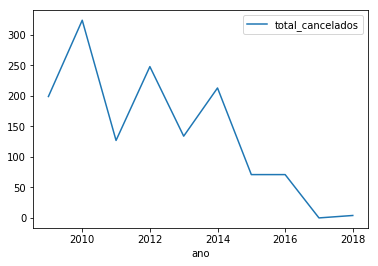

In [147]:
%matplotlib inline
k.plot(kind='line',x='ano', y='total_cancelados')
plt.show()